# 6.3. Inicialização de Parâmetros

O framework de aprendizado profundo fornece inicializações aleatórias padrão para suas camadas. No entanto, geralmente queremos inicializar nossos pesos de acordo com vários outros protocolos. O framework fornece os protocolos mais comumente usados ​​e também permite criar um inicializador personalizado.

In [1]:
import torch
from torch import nn

In [2]:
net = nn.Sequential(nn.LazyLinear(8), nn.ReLU(), nn.LazyLinear(1))
X = torch.rand(size=(2, 4))
net(X).shape

C:\Users\zeh\pythonProject\.venv\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([2, 1])

In [3]:
net

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [6]:
net(X)                                      # saída y

tensor([[0.0001],
        [0.0003]], grad_fn=<AddmmBackward0>)

In [4]:
[(name, param.shape) for name, param in net.named_parameters()]

[('0.weight', torch.Size([8, 4])),
 ('0.bias', torch.Size([8])),
 ('2.weight', torch.Size([1, 8])),
 ('2.bias', torch.Size([1]))]

# 6.3.1. Inicialização Integrada

Vamos começar chamando inicializadores internos. O código abaixo inicializa todos os parâmetros de peso como variáveis ​​aleatórias gaussianas com desvio padrão de 0,01, enquanto os parâmetros de viés são zerados.

In [16]:
def init_normal(module): # Em module.py:     def apply(self: T, fn: Callable[['Module'], None]) -> T:
    if type(module) == nn.Linear:
        nn.init.normal_(module.weight, mean=0, std=0.01)  # inicialização de w com distribuição normal, com média=0 e devio padrão=0.01
        nn.init.zeros_(module.bias)                       # inicialização de b com zeros.  

net.apply(init_normal)                                    # aplica a inicialização criada na função init_normal.
net[0].weight.data[0], net[0].bias.data[0]

(tensor([-0.0132, -0.0226, -0.0101,  0.0024]), tensor(0.))

In [17]:
net[0].weight

Parameter containing:
tensor([[-0.0132, -0.0226, -0.0101,  0.0024],
        [-0.0102, -0.0183,  0.0017, -0.0248],
        [ 0.0079,  0.0173,  0.0188,  0.0099],
        [ 0.0121,  0.0069, -0.0072,  0.0014],
        [-0.0184,  0.0021,  0.0177, -0.0116],
        [ 0.0068,  0.0026, -0.0015, -0.0141],
        [ 0.0091, -0.0126, -0.0190,  0.0035],
        [ 0.0074,  0.0056,  0.0010, -0.0081]], requires_grad=True)

In [18]:
net[0].bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

------------------------------------------------

Também podemos inicializar todos os parâmetros para um determinado valor constante (digamos, 1).

In [19]:
def init_constant(module):
    if type(module) == nn.Linear:
        nn.init.constant_(module.weight, 1)  # inicialização de w com 1.
        nn.init.zeros_(module.bias)          # inicialização de b com zeros.

net.apply(init_constant)                     # aplica a inicialização criada na função init_constant.
net[0].weight.data[0], net[0].bias.data[0]

(tensor([1., 1., 1., 1.]), tensor(0.))

In [20]:
net[0].weight

Parameter containing:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)

In [21]:
net[2].weight

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

In [22]:
net[0].bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [23]:
net[2].bias

Parameter containing:
tensor([0.], requires_grad=True)

---------------------------------------

Também podemos aplicar inicializadores diferentes para certos blocos. Por exemplo, abaixo inicializamos a primeira camada com o inicializador Xavier e inicializamos a segunda camada para um valor constante de 42.

In [29]:
def init_xavier(module):
    if type(module) == nn.Linear:
        nn.init.xavier_uniform_(module.weight)
# Existem dois tipos de inicialização xavier:
# xavier_uniform 
# xavier_normal 


def init_42(module):
    if type(module) == nn.Linear:
        nn.init.constant_(module.weight, 42)

net[0].apply(init_xavier)                       # aplica a inicialização criada na função init_xavier na camada 0 de net.
net[2].apply(init_42)                           # aplica a inicialização criada na função init_42 na camada 2 de net.
print(net[0].weight.data[0])
print(net[2].weight.data)

tensor([ 0.3519, -0.0678,  0.3684, -0.6234])
tensor([[42., 42., 42., 42., 42., 42., 42., 42.]])


In [28]:
# Inicializadores:

# uniform = _make_deprecate(uniform_)
# normal = _make_deprecate(normal_)
# constant = _make_deprecate(constant_)
# eye = _make_deprecate(eye_)
# dirac = _make_deprecate(dirac_)
# xavier_uniform = _make_deprecate(xavier_uniform_)
# xavier_normal = _make_deprecate(xavier_normal_)
# kaiming_uniform = _make_deprecate(kaiming_uniform_)
# kaiming_normal = _make_deprecate(kaiming_normal_)
# orthogonal = _make_deprecate(orthogonal_)
# sparse = _make_deprecate(sparse_)

--------------------------------------------------

# 6.3.1.1. Inicialização personalizada

Às vezes, os métodos de inicialização que precisamos não são fornecidos pelo framework de aprendizado profundo. No exemplo abaixo, definimos um inicializador para qualquer parâmetro de peso usando a seguinte distribuição estranha:

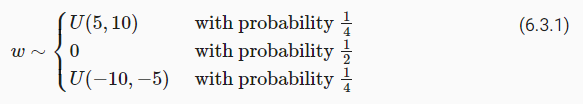

In [34]:
[(name, param.shape) for name, param in net.named_parameters()][0]

('0.weight', torch.Size([8, 4]))

In [41]:
[(name, param.shape) for name, param in net.named_parameters()]

[('0.weight', torch.Size([8, 4])),
 ('0.bias', torch.Size([8])),
 ('2.weight', torch.Size([1, 8])),
 ('2.bias', torch.Size([1]))]

In [39]:
print("Init", *[(name, param.shape)
                        for name, param in net.named_parameters()][0])

Init 0.weight torch.Size([8, 4])


In [42]:
def my_init(module):
    if type(module) == nn.Linear:
        print("Init", *[(name, param.shape)
                        for name, param in module.named_parameters()][0])
        nn.init.uniform_(module.weight, -10, 10)
        module.weight.data *= module.weight.data.abs() >= 5

net.apply(my_init)
net[0].weight[:2]

Init weight torch.Size([8, 4])
Init weight torch.Size([1, 8])


tensor([[-0.0000, -0.0000,  8.6149,  9.0749],
        [-7.2819, -0.0000, -5.4839,  9.4762]], grad_fn=<SliceBackward0>)

Observe que sempre temos a opção de definir parâmetros diretamente.

In [43]:
net[0].weight.data[:] += 1
net[0].weight.data[0, 0] = 42
net[0].weight.data[0]

tensor([42.0000,  1.0000,  9.6149, 10.0749])

# 6.3.3. Exercícios

# Consulte a documentação on-line para obter mais inicializadores integrados.

In [ ]:
# Inicializadores:

# uniform = _make_deprecate(uniform_)
# normal = _make_deprecate(normal_)
# constant = _make_deprecate(constant_)
# eye = _make_deprecate(eye_)
# dirac = _make_deprecate(dirac_)
# xavier_uniform = _make_deprecate(xavier_uniform_)
# xavier_normal = _make_deprecate(xavier_normal_)
# kaiming_uniform = _make_deprecate(kaiming_uniform_)
# kaiming_normal = _make_deprecate(kaiming_normal_)
# orthogonal = _make_deprecate(orthogonal_)
# sparse = _make_deprecate(sparse_)